前面的教程大都是在做数据分析的准备，这一教程我们将用一个常见模型作为例子，为大家展示如何利用python包开始进行分析。

## ARIMA模型

ARIMA模型的中文叫差分整合移动平均自回归模型，这里暂时不做介绍，只是拿来使用，告诉大家如何用python来调用别人的写好的程序和一个简单的python分析案例。

首先我们要**准备数据**。csv是常见的数据格式，对于这种格式我们用pandas来读取即可。

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')  # 告警信息不显示

data = pd.read_csv("data/Google.csv",sep=",",parse_dates=['Date'],index_col='Date')
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


然后我们向**ARIMA方法**输入数据，简单两行就可以得到拟合后的模型。然后我们将模型输出出来看看。

In [3]:
model = ARIMA(data['Adj. Low'], order=(5,1,0))
model_fit = model.fit(disp=0)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.Adj. Low   No. Observations:                 3124
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -10009.078
Method:                       css-mle   S.D. of innovations              5.960
Date:                Tue, 02 Apr 2019   AIC                          20032.156
Time:                        15:43:46   BIC                          20074.484
Sample:                             1   HQIC                         20047.350
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2478      0.109      2.278      0.023       0.035       0.461
ar.L1.D.Adj. Low     0.1122      0.018      6.276      0.000       0.077       0.147
ar.L2.D.Adj. Low    -0.0252      0.018     -1.397      0.162      -0.060       0.010
ar.L3.D.Adj. Low    -0.0163      0.018     -0.905      0.365      -0.052       0.019
ar.L4.D.Adj. Low    -0.0186      0.018     -1.032      0.302      -0.054       0.017
ar.L5.D.Adj. Low    -0.0324      0.018     -1.812      0.070      -0.067       0.003
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4271           -1.1307j            1.8207           -0.1066
AR.2            1.4271           +1.1307j            1.8207            0.1066
AR.3           -2.1867           -0.0000j            2.1867           -0.5000
AR.4           -0.6204           -1.9679j            2.0634           -0.2986
AR.5           -0.6204           +1.9679j            2.0634            0.2986
-----------------------------------------------------------------------------
"""

模型里有很多内容，看起来并不直观，所以我们挑出残差序列来画图看看。  
更多的模型结论可以看[文档](https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_model.ARIMAResults.html#statsmodels-tsa-arima-model-arimaresults)。

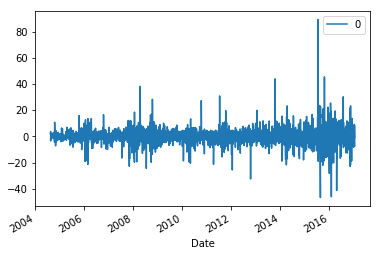

In [4]:
resd = pd.DataFrame(model_fit.resid)
resd.plot()

这样我们就完成了一次简单的对ARIMA模型的分析，后面我们将介绍更多的案例。